# Seaborn Introduction

In [4]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats,integrate
import seaborn as sns

In [5]:
sns.set(color_codes = True)

In [7]:
np.random.seed(sum(map(ord,'distributions')))

# This is not required at all seaborn people wanted to make sure all the graphs should be reproducible
# ord gives the byte representation of the string
# map applies to each iterable and sum' sums up everything and then that number is fed as seed

# DIST PLOT

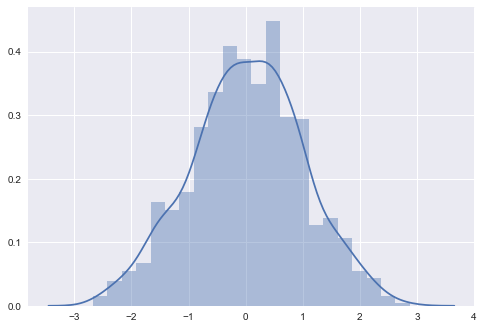

In [8]:
x = np.random.normal(size = 1000)
sns.distplot(x)

# Dist plot is a combination of a normal histogram and a kernel density estimation(kde).

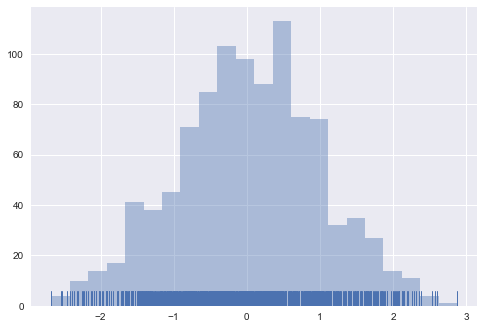

In [9]:
sns.distplot(x,kde = False,rug = True)
# Though there is a direct histogram function we can also draw it setting kde as false.
# rug is the observations made at each point.There is a separate rugplot() command

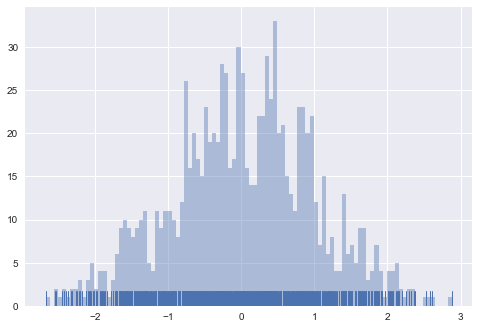

In [12]:
# Specifying bins

sns.distplot(x,bins=100,kde = False,rug = True)

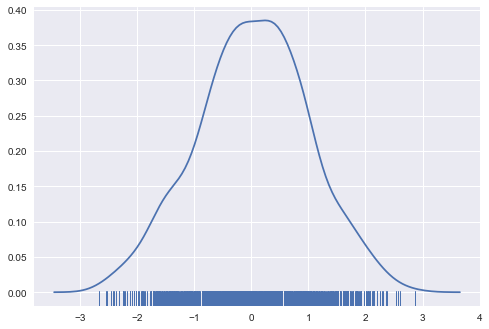

In [13]:
# Drawing a kernel density estimate.
sns.distplot(x,hist = False,rug = True)

# Drawing a kde is more computationally expensive (because of iterations inside).

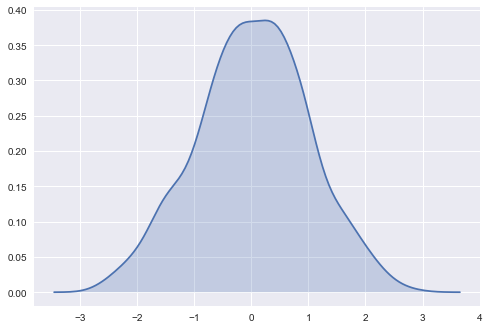

In [14]:
sns.kdeplot(x,shade = 0.2)

# Note that there is also a kdeplot function in seaborn.instead of alpha to get opacity here it is acheived by shade argument

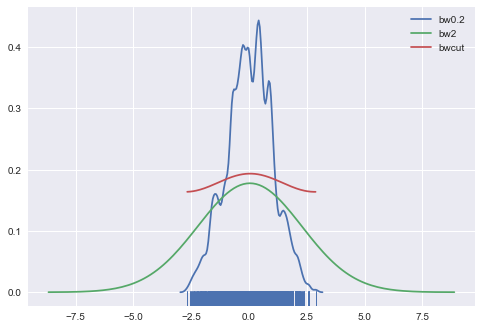

In [45]:
sns.kdeplot(x,bw = 0.1,label = 'bw0.2')
sns.kdeplot(x,bw = 2,label = 'bw2')
sns.kdeplot(x,bw = 2,cut =0,label = 'bwcut')
sns.rugplot(x)

# I didnt got any idea how cut argument works.but it maybe cutting the graph at bandwidths length.

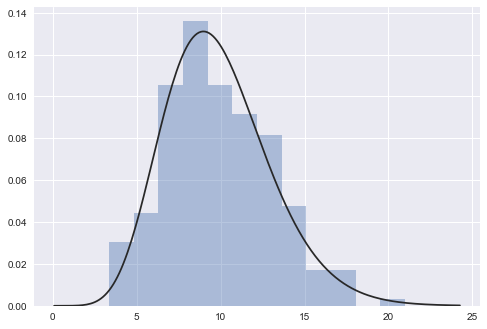

In [56]:
x = np.random.gamma(shape = 10,size = 200)
sns.distplot(x,kde = False,fit = stats.gamma)

# In this example kde is absent but the curve is of gamma function to ceck for the fitting of data
# What does shape define exactly?
# What is gamma?


In [57]:
print (x)

# This will explain how the curve is drawn.

[  6.60285017   8.21665019  12.4232504   10.10706116  14.92494238
   8.73465877  13.7373578   12.06821246  13.32749626   4.51878965
   9.14283932  10.95181733  11.87337927  12.52633065  13.868509
  12.45365236   9.0751868    7.05673767  12.99021169   8.18444396
  10.50411025   7.66634086   7.79148683   9.16716733   6.113291
  10.11280829   8.96082402   6.73116455  12.17568252   9.03121129
  16.35066121   7.93568307  15.80576542  12.09482607   7.09402213
   3.93757947   7.28805357  10.61880616   9.36365755  12.97081779
   6.23948609  10.01961995   6.49309548   3.34418669   8.76471383
   6.90311177   8.58516794   6.12191252   8.92101118   9.77126084
  10.29840419  10.81326396   6.07927737   8.38389648  11.88907312
   7.82505139  10.03566628  14.87497644  10.76220306   9.91116789
  11.57934781   8.1326906   16.60156755  14.20324269   6.60707504
   4.39650095  16.63217602   9.60814328   4.65524019  11.38678214
   6.38950605   8.75497633  20.99452065   6.56280467  12.65677137
  13.31633067 

# Plotting Bivariate Variables

In [69]:
# multi-variate distribution is gaussian distribution

mean,cov = [0,1],[(1,0.5),(0.5,1)]
data = np.random.multivariate_normal(mean,cov,200)
df = pd.DataFrame(data,columns = ['Col1','Col2'])

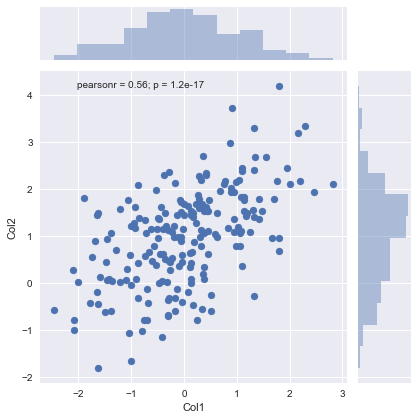

In [62]:
sns.jointplot(x = 'Col1',y = 'Col2',data = df)

# the histograms on X and Y axes are analogus to the rugged plots.

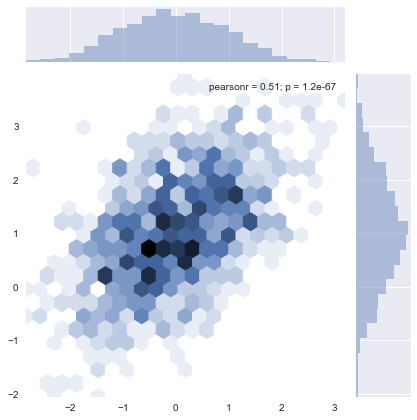

In [96]:
x,y = np.random.multivariate_normal(mean,cov,1000).T
sns.jointplot(x=x,y=y,kind = 'hex')

# Should get some clarity on multivariate_normal

In [ ]:
# Above same graph is represented in document as below

x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");
    
# sns.axes_style is specifying white background

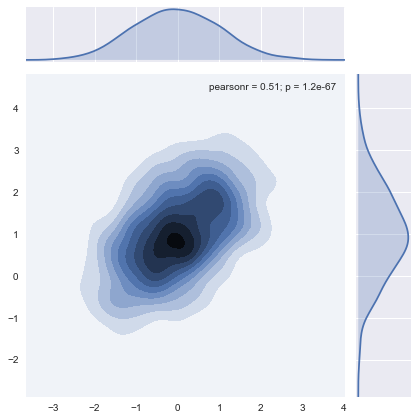

In [98]:
# Data to estimate this kernel density estimation function came from above.
# when plotting with joint plot we didn't specified kind to scatter plot but specified explicitly to hexbin and kde.

sns.jointplot(x = x,y = y,kind = 'kde')

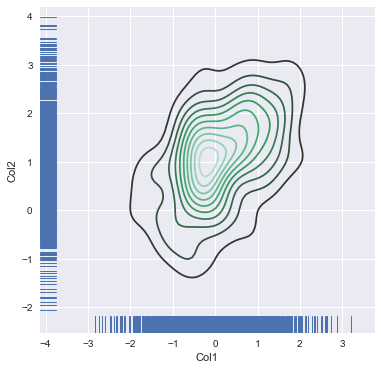

In [111]:
f,ax = plt.subplots(figsize = (6,6))
sns.kdeplot(df.Col1,df.Col2,ax = ax)
sns.rugplot(x,ax = ax)
sns.rugplot(y,vertical = True,ax = ax)

# speccifying only 'y' is not enough we need to specify vertical = False also

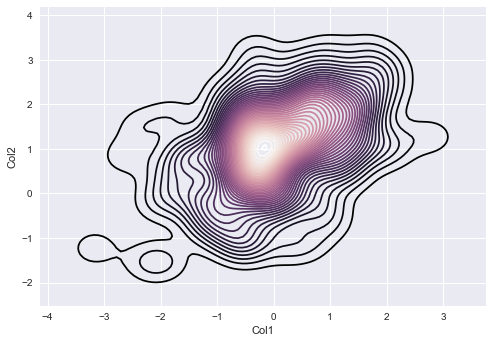

In [127]:
cmap = sns.cubehelix_palette(as_cmap = True,dark = 0,light = 1,reverse = True)
sns.kdeplot(df.Col1,df.Col2,cmap = cmap,n_levels = 50,shade = False)

# Each of the above parameter is important;for printing kdeplot columns should be given and that's mandatory
# cmap is optional 
# n_levels is number of contour layers
# shade is opaqueness
# Inside the cmap command as_cmap = True is necessary
# Dark and light arguments function as their name says
# I didnt really understood the function of reverse

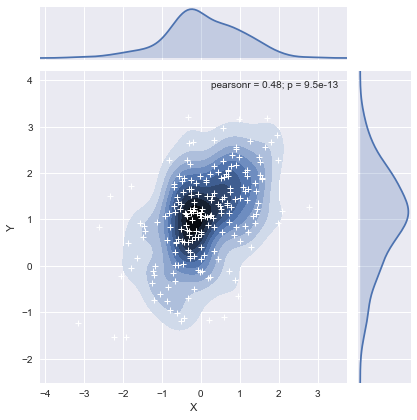

In [147]:
k = sns.jointplot(x = 'Col1',y = 'Col2',data = df,kind = 'kde')
# Jointgrid is not working as said in documentation;It is said that jointplot is built on jointgrid.
# update:jointgrids are working in other places 

k.plot_joint(plt.scatter,color = 'w',s = 30,linewidth = 1,marker = '+')
k.ax_joint.collections[0].set_alpha(0)

k.set_axis_labels('$X$','$Y$')
# k.set_axis_labels('X','Y)..This will also work but enclosed by $ signs will make 'X' and 'Y' italic.

# Not clear about the working of ax_joint
# collections[0] is selecting outer most cotour likewise collections[1] represents last second column
# plot_joint joins will help us join a new parameters or ideas like plt.scatter with marker.
# s and linewidth are all properties of marker

# Visualising pairwise relationship in a dataset

In [148]:
iris = sns.load_dataset('iris')

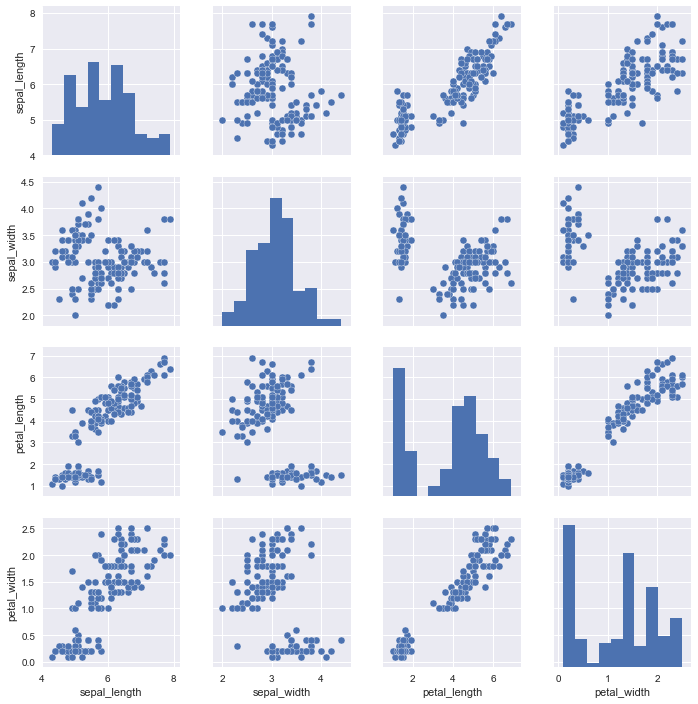

In [150]:
sns.pairplot(iris)

C:\Users\user\anaconda_new\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


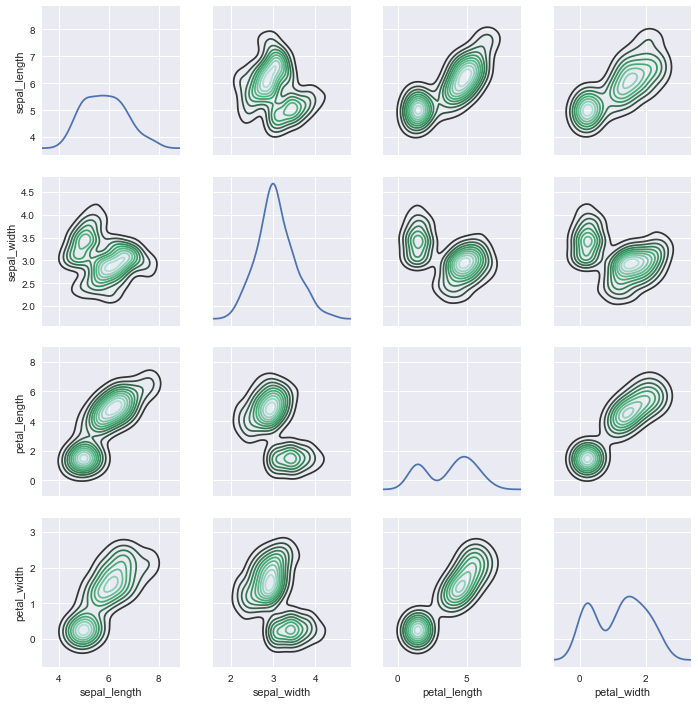

In [159]:
# just like jointplot() and jointgrid(); pairplot() is built on pairgrid()

d = sns.PairGrid(iris)
d.map_diag(sns.kdeplot)
d.map_offdiag(sns.kdeplot)

C:\Users\user\anaconda_new\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


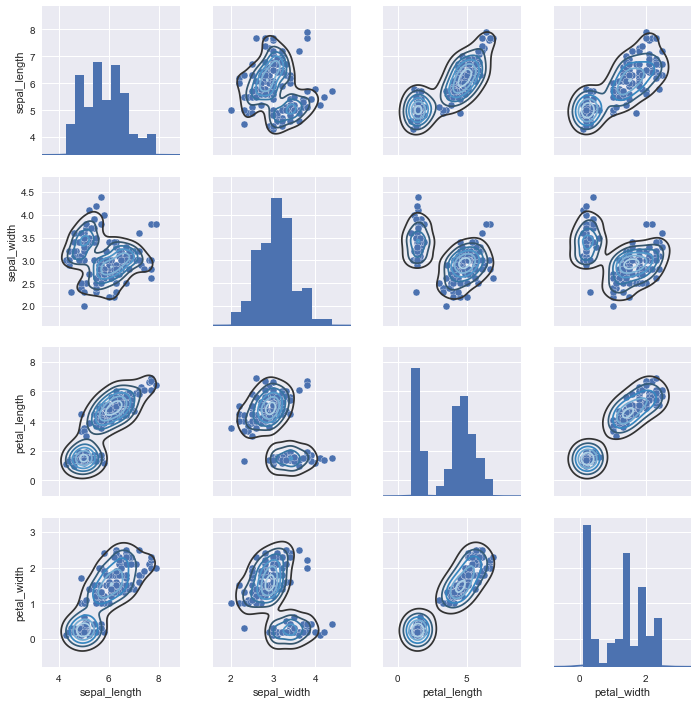

In [166]:
# You can actually change the color and counter levels of the off_diag columns like shown below

d = sns.pairplot(iris)
# please note that the graph is showed only upto this pairplot level
# that is why we need to use PairGrid

d.map_diag(sns.kdeplot)
d.map_offdiag(sns.kdeplot,cmap = 'Blues_d',n_levels = 6)

C:\Users\user\anaconda_new\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


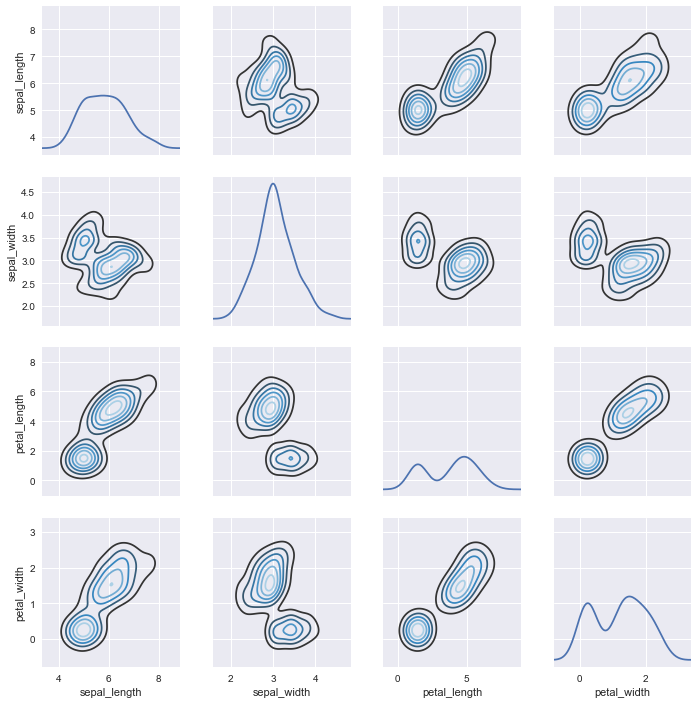

In [167]:
# Graph printed by pairgrid

d = sns.PairGrid(iris)
d.map_diag(sns.kdeplot)
d.map_offdiag(sns.kdeplot,cmap = 'Blues_d',n_levels = 6)